In [3]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_random  import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [4]:
#DATA_DIR = '../../data/Xy_internal_split_data'
DATA_DIR = '../../data/Xy_random_split_data'

In [5]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)

In [6]:
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv'] 
  ['y_train_1998.csv', 'y_train_1999.csv', 'y_train_2000.csv', 'y_train_2001.csv', 'y_train_2002.csv', 'y_train_2003.csv', 'y_train_2004.csv', 'y_train_2005.csv', 'y_train_2006.csv', 'y_train_2007.csv', 'y_train_2008.csv', 'y_train_2009.csv', 'y_train_2010.csv', 'y_train_2011.csv', 'y_train_2012.csv', 'y_train_2013.csv', 'y_train_2014.csv', 'y_train_2015.csv']
Valid:
  ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.cs

In [7]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [8]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (779953, 119)
 y: (779953, 1)
Valid:
 X: (97348, 119)
 y: (97348, 1)
Test:
 X: (97687, 119)
 y: (97687, 1)


In [9]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:
cv.gsp:	12102


In [10]:
max(X_test.x), max(X_test.y)

(-140000.0, 1530000.0)

In [11]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:density,age:summerTmean,age:summerP0,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul
0,-390000.0,-2050000.0,-104.049028,31.372977,989,0,0,0,0.0,2716.003174,...,0.0,0.0,0.0,0.0,-1473.564844,49484.206390,225428.263428,16965.632290,1514.267146,2.558747e+07
1,-380000.0,-2050000.0,-103.945326,31.377509,948,0,0,0,0.0,3117.953125,...,0.0,0.0,0.0,0.0,-1467.093189,57481.386511,249436.250000,-96041.483466,1622.881515,2.971721e+07
2,-370000.0,-2050000.0,-103.841614,31.381924,898,0,0,0,0.0,2278.080811,...,0.0,0.0,0.0,0.0,-795.541961,42413.936994,177690.303223,-75607.343318,1164.073386,2.182174e+07
3,-360000.0,-2050000.0,-103.737894,31.386221,863,0,0,0,0.0,667.851807,...,0.0,0.0,0.0,0.0,-153.945084,12539.515016,50756.737305,-21498.983425,331.894167,6.430745e+06
4,-350000.0,-2050000.0,-103.634165,31.390401,831,0,0,0,0.0,297.401764,...,0.0,0.0,0.0,0.0,-67.416107,5635.981228,21412.927002,-12635.138931,144.954556,2.885987e+06


In [12]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density')

matrix shape: (196, 361)


In [13]:
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density')

matrix shape: (185, 355)


In [14]:
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density')

matrix shape: (192, 359)


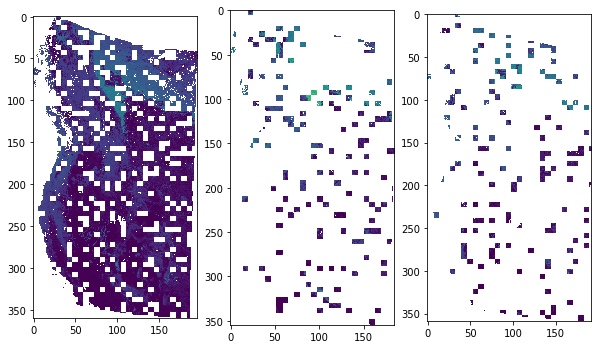

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [16]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1')
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1')
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1')

matrix shape: (196, 361)
matrix shape: (185, 355)
matrix shape: (192, 359)


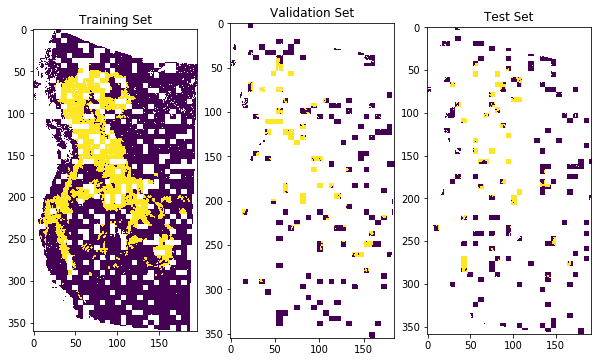

In [17]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [18]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 17.56%
Percent presence in y_valid: 17.49%
Percent presence in y_test: 17.56%


In [19]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 33.03)
print('  valid:', 100 - 10.31)
print('  test: ', 100 - 1.44)

Baseline accuracy if predicting "absent" for all cells:
  train: 66.97
  valid: 89.69
  test:  98.56


In [20]:
y_train.columns=['btl_t']
y_valid.columns=['btl_t']
y_test.columns=['btl_t']

In [21]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [22]:
predictors = list(X_train)

In [23]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [24]:
def drop_NA(df):
    df = df[df.columns.drop(list(df.filter(regex='cv.gsp')))]
    return df

In [25]:
X_train = drop_NA(X_train)

In [26]:
X_valid = drop_NA(X_valid)
X_test = drop_NA(X_test)

In [27]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [28]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [28]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.929
Elapsed time: 0.19 minutes
  l2: 0.9316
Elapsed time: 0.54 minutes
Testing C = 0.001
  l1: 0.9313
Elapsed time: 1.19 minutes
  l2: 0.9318
Elapsed time: 1.68 minutes
Testing C = 0.01
  l1: 0.9315
Elapsed time: 10.12 minutes
  l2: 0.9317
Elapsed time: 11.38 minutes
Testing C = 0.1
  l1: 0.9321
Elapsed time: 47.50 minutes
  l2: 0.9322
Elapsed time: 49.40 minutes
Testing C = 1.0
  l1: 0.932
Elapsed time: 117.56 minutes
  l2: 0.9321
Elapsed time: 120.96 minutes


In [29]:
!say "I'm done"

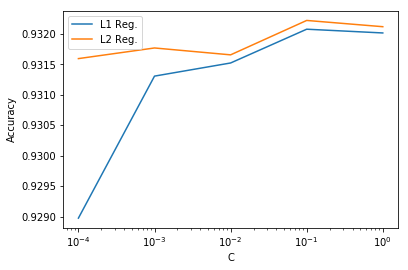

In [30]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [31]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-1.5, -0.5, 4)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.03162277660168379
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9319
Elapsed time: 17.25 minutes
  l2: 0.9319
Elapsed time: 18.57 minutes
Testing C = 0.06812920690579612
  l1: 0.9322
Elapsed time: 46.77 minutes
  l2: 0.9322
Elapsed time: 48.83 minutes
Testing C = 0.14677992676220694
  l1: 0.9321
Elapsed time: 87.75 minutes
  l2: 0.9322
Elapsed time: 90.51 minutes
Testing C = 0.31622776601683794
  l1: 0.9321
Elapsed time: 146.13 minutes
  l2: 0.9322
Elapsed time: 149.95 minutes


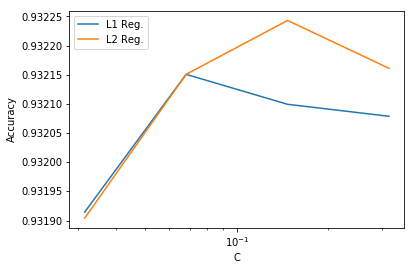

In [32]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [46]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.03162277660168379, 0.9319040966429716),
 (0.06812920690579612, 0.9321506348358467),
 (0.14677992676220694, 0.9322430866581748),
 (0.31622776601683794, 0.9321609072605498)]

In [29]:
best_C = 0.14677992676220694

In [30]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.9347098385660323

In [31]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[9.99993994e-01 6.00557593e-06]
 [9.99994049e-01 5.95115066e-06]
 [9.99994186e-01 5.81356836e-06]
 [9.99994235e-01 5.76460700e-06]
 [9.96659993e-01 3.34000724e-03]]


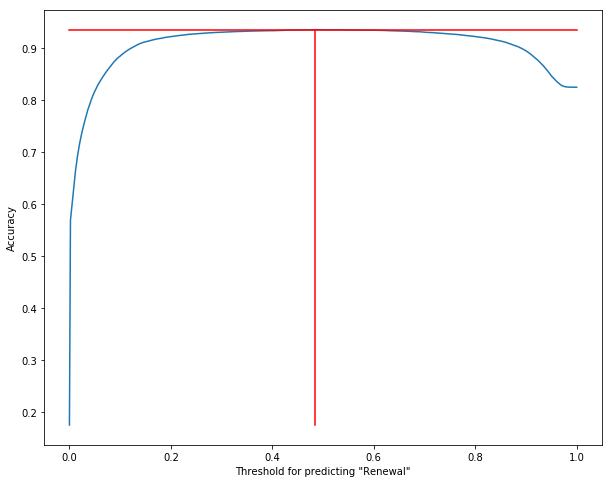

{'threshold': 0.4849699398797595, 'accuracy': 0.9348429166624014}


In [32]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [33]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	13679		3478
        0	2900		77630
Accuracy:  0.9347098385660323
Precision: 0.8250799203812051
Recall:    0.7972839074430261
F1:        0.810943798909177


In [34]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	13784		3373
        0	2992		77538
Accuracy:  0.9348429166624014
Precision: 0.8216499761564139
Recall:    0.8034038584834179
F1:        0.8124244835410958


In [35]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9720765162192906


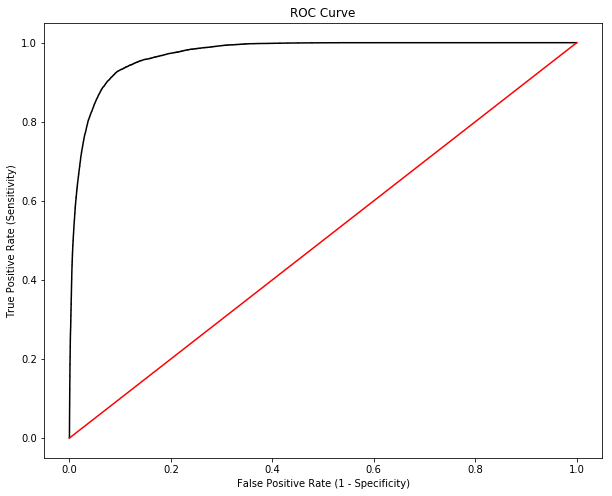

In [36]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [37]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
25,Tmean,-3.935329
75,lon_sq,-3.643293
7,vgt,3.067077
17,AugTmean,-2.658606
91,Tvar_sq,-2.624989
15,TMarAug,2.473730
24,Tmin,2.428365
27,TOctSep,2.213667
90,OctTmin_sq,-1.816488
84,summerTmean_sq,1.753111


In [38]:
print(full_train.shape)
#type(pred_ps_train)

(779953, 120)


In [39]:
logistic_clf.predict_proba(X_train)

array([[9.99992283e-01, 7.71687240e-06],
       [9.99993093e-01, 6.90681878e-06],
       [9.99993415e-01, 6.58472241e-06],
       ...,
       [9.99916540e-01, 8.34603698e-05],
       [9.99896797e-01, 1.03203402e-04],
       [9.99878636e-01, 1.21363785e-04]])

In [40]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [41]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul,btl_t,probs,preds
0,-520000.0,-2040000.0,-105.402121,31.394508,1382,0,0,0,0.0,0.000000,...,0.0,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000e+00,0,0.000006,0
1,-510000.0,-2040000.0,-105.298448,31.400574,1405,0,0,0,0.0,0.000000,...,0.0,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000e+00,0,0.000006,0
2,-500000.0,-2040000.0,-105.194763,31.406522,1414,0,0,0,0.0,0.000000,...,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,0.000006,0
3,-490000.0,-2040000.0,-105.091066,31.412353,1489,0,0,0,0.0,0.000000,...,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,0.000006,0
4,-480000.0,-2040000.0,-104.987357,31.418067,1735,0,0,1,0.0,2595.206055,...,0.0,-6257.033789,38944.683389,238758.957031,132257.664843,1457.280436,1.995713e+07,0,0.003340,0


In [42]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [45]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 361)
matrix shape: (196, 361)
matrix shape: (196, 361)
matrix shape: (196, 361)


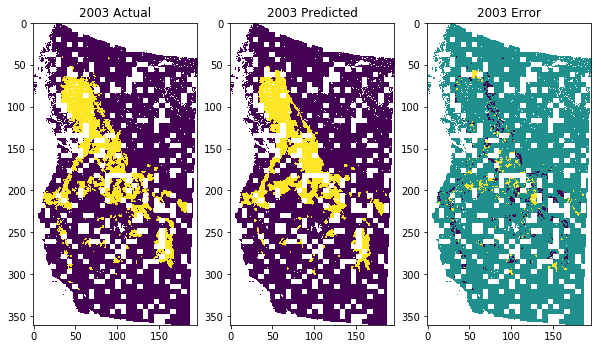

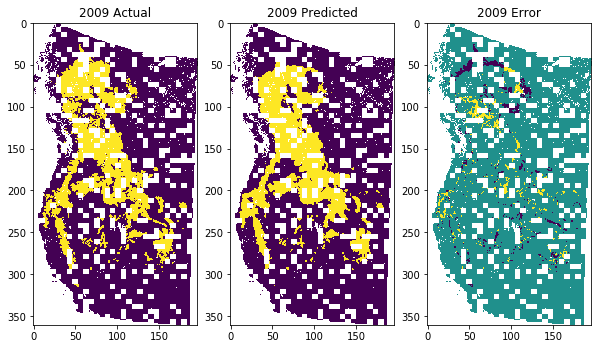

In [46]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (187, 348)
matrix shape: (187, 348)
matrix shape: (185, 355)
matrix shape: (185, 355)


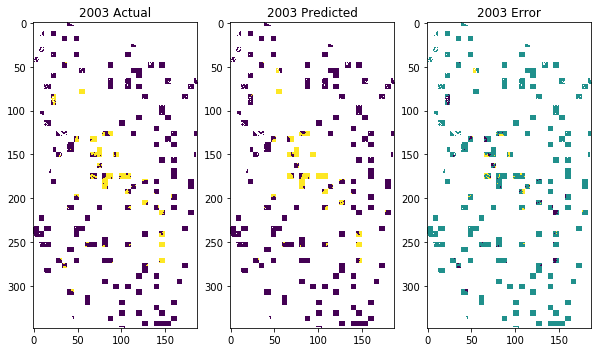

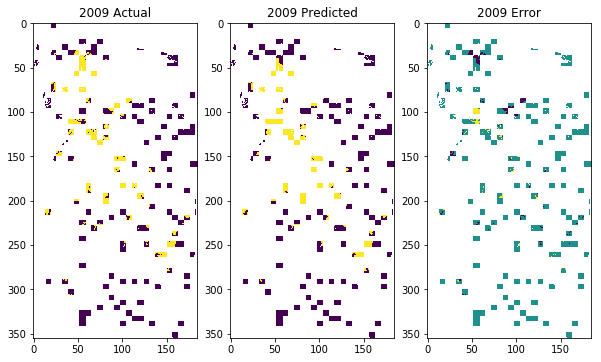

In [47]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (195, 348)
matrix shape: (195, 348)
matrix shape: (192, 359)
matrix shape: (192, 359)


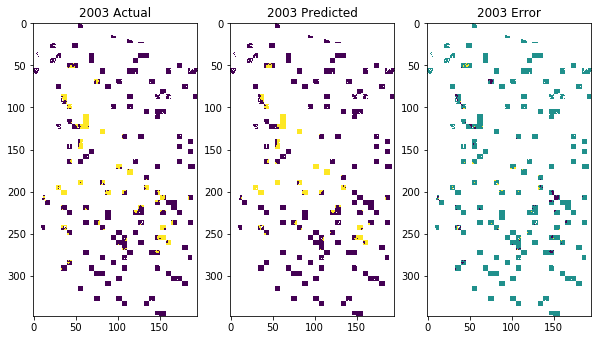

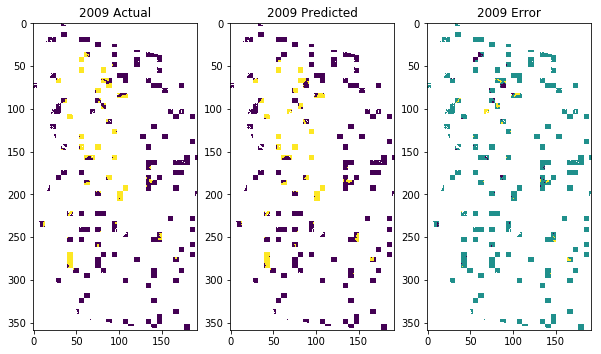

In [48]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [49]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 361)
matrix shape: (196, 361)
matrix shape: (196, 361)
matrix shape: (196, 361)


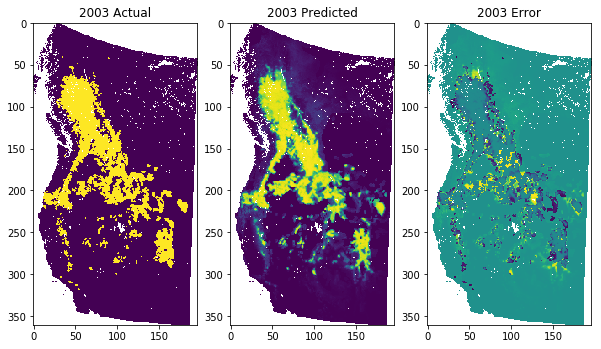

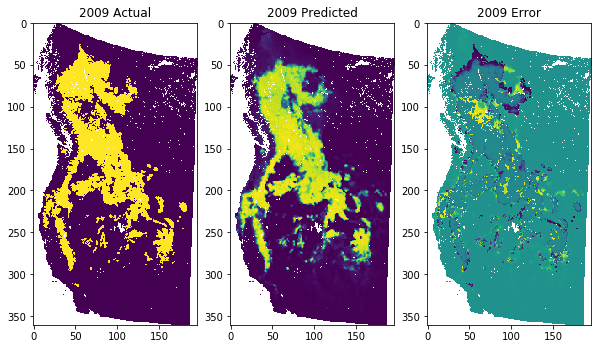

In [50]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [51]:
!say "I'm done"